# Raíces de funciones irracionales: Método de la falsa posición (Regula Falsi).

El método de la falsa posición pretende conjugar la seguridad del método de la bisección con la rapidez del método de la secante.

El término Regula Falsi literalmente “regla falsa” o “posición falsa” se refiera a una técnica en la que se usan resultados que se sabe son falsos, genera aproximaciones de la misma manera que el método de la secante, pero incluye una prueba para garantizar que la raíz siempre se agrupa entre iteraciones sucesivas, para obtener convergencia a un resultado verdadero.


Teniendo una función continua entre $ [x_{n-1},x_n] $. La fórmula del algoritmo puede plantearse como: 

$$ x_{n+1} = \frac{(x_{n-1})(f(x_n))-(x_n)(f(x_{n-1}))}{(f(x_n)-f(x_{n-1}))} $$

Para la implementación se inicia con agregar las librerías a utilizar y algunas funciones utilitarias.

In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#Calculating Absolute error: |xn - xn-1|
def AbsoluteError(x,y):
    return (abs(x - y))

#Base dictionary structure to store data
def CreateDictionary(columns):
    dictionary = {}

    for c in columns:
        dictionary[c] = []

    return dictionary

#Adding info to our dictionary
def AddInfo(dictionary, columns, values):
    i = 0

    for c in columns:
        dictionary[c].append(values[i])
        i += 1

#Graphs
def DrawGraph(f, a, b):
    axis_x = np.linspace(a, b, 10000)

    axis_y = np.vectorize(f)

    #Configuring axis
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.spines['left'].set_position('center')
    ax.spines['bottom'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

    #Function plot
    plt.plot(axis_x, axis_y(axis_x), 'r')

    # show the plot
    plt.show()

Luego crearemos una función base la cual, por efectos prácticos, nos devolverá una tabla donde se muestren todas la iteraciones y error abosuluto obtenidos a partir de una función $ f(x) $, contenida en $ [a,b] $, con una tolerancia $ TOL $ y un número máximo de iteraciones $ n\_max $.

In [3]:
def RegulaFalsi(f, p0, p1, TOL, n_max):
    
    #Define table in order to store data:
    cols = ("Xn-1", "f(Xn-1)", "Xn", "f(Xn)", "Xn+1", "f(Xn+1)", "error")
    table = CreateDictionary(cols)

    #Define initial values, p = last approximation and pn = current approximation
    i = 2
    q0 = f(p0)
    q1 = f(p1)

    data = []

    if ((q0 * q1) > 0):
        print(f"Error, no existe ninguna raíz contenida entre [{p0},{p1}]")
        return

    while (i <= n_max):
        
        #Regula falsi algorithm
        p = (p0 - ((q0 * (p1 - p0)) / (q1 - q0)))

        approximation_error = AbsoluteError(p, p0)

        q = f(p)

        #Interpolate table
        data = [p0, q0, p1, q1, p, q, approximation_error]
        AddInfo(table, cols, data)

        
        if (approximation_error < TOL):
            print(f"La raíz encontrada es {round(p,10)}")
            break

        i = (i + 1)

        if (q*q1 < 0):
            p0 = p1
            q0 = q1

        p0 = p
        q0 = q

    if (i >= n_max):
        print("no se pudo encontrar una raíz con la precisión especificada.")
        return
    else:
        return table

Como primer ejemplo y demostración de uso, utilizaremos la función: $$ f(x) = (x - 2\sin(x) - (\frac{1}{2})) $$
Contenida entre $ [1,3] $ con una presición $\epsilon = 10^{-5}$

In [4]:
#f(x)
f = lambda x: (x - 2*math.sin(x) - (1 / 2))

#[a,b]
a = 1
b = 3

# | f | a | b | TOL | n_max |
root = RegulaFalsi(f, a, b, (10**-5), 50)

#Printing data
df = pd.DataFrame(root)
display(df)

La raíz encontrada es 2.1613080117


,Xn-1,f(Xn-1),Xn,f(Xn),Xn+1,f(Xn+1),error
0,1.000000,-1.182942,3,2.21776,1.695705,-0.788714,0.695705
1,1.695705,-0.788714,3,2.21776,2.037871,-0.247907,0.342167
2,2.037871,-0.247907,3,2.21776,2.134607,-0.055842,0.096736
3,2.134607,-0.055842,3,2.21776,2.155862,-0.011489,0.021255
4,2.155862,-0.011489,3,2.21776,2.160213,-0.002318,0.004351
5,2.160213,-0.002318,3,2.21776,2.161089,-0.000466,0.000877
6,2.161089,-0.000466,3,2.21776,2.161266,-0.000093,0.000176
7,2.161266,-0.000093,3,2.21776,2.161301,-0.000019,0.000035
8,2.161301,-0.000019,3,2.21776,2.161308,-0.000004,0.000007


Gráficando la función, podemos corroborar que esa es la raíz encontrada es correcta:

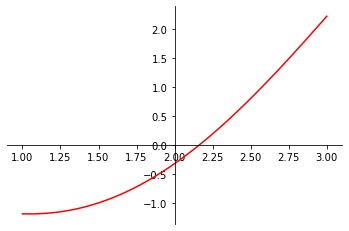

In [5]:
# | f | a | b |
DrawGraph(f, a, b)

Continuando con el tercer ejemplo, utilizaremos la función: $$ f(x) = \sqrt[5]{x\cos(\frac{x}{x-2})} $$
Contenida entre $ [1,1.5] $ con una presición $\epsilon = 10^{-14}$

In [8]:
#f(x)
f = lambda x: (x * math.cos(x / (x - 2)))**1/5

#[a,b]
a = 1
b = 1.5

# | f | a | b | TOL | n_max |
root = RegulaFalsi(f, a, b, (10**-14), 50)

#Printing data
df = pd.DataFrame(root)
display(df)

La raíz encontrada es 1.2220309407


,Xn-1,f(Xn-1),Xn,f(Xn),Xn+1,f(Xn+1),error
0,1.000000,1.080605e-01,1.5,-0.296998,1.133389,5.892179e-02,1.333888e-01
1,1.133389,5.892179e-02,1.5,-0.296998,1.194081,2.126432e-02,6.069178e-02
2,1.194081,2.126432e-02,1.5,-0.296998,1.214520,5.970408e-03,2.043966e-02
3,1.214520,5.970408e-03,1.5,-0.296998,1.220146,1.516307e-03,5.625774e-03
4,1.220146,1.516307e-03,1.5,-0.296998,1.221568,3.738959e-04,1.421523e-03
5,1.221568,3.738959e-04,1.5,-0.296998,1.221918,9.149803e-05,3.500830e-04
6,1.221918,9.149803e-05,1.5,-0.296998,1.222003,2.234886e-05,8.564426e-05
7,1.222003,2.234886e-05,1.5,-0.296998,1.222024,5.456305e-06,2.091747e-05
8,1.222024,5.456305e-06,1.5,-0.296998,1.222029,1.331966e-06,5.106749e-06
9,1.222029,1.331966e-06,1.5,-0.296998,1.222031,3.251438e-07,1.246628e-06


Gráficando la función, podemos corroborar que esa es la raíz encontrada es correcta:

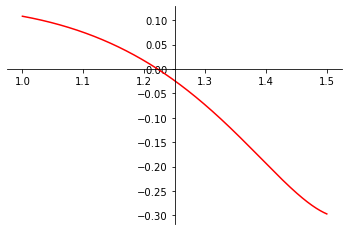

In [9]:
# | f | a | b |
DrawGraph(f, a, b)

En un laboratorio analizan partículas y el tiempo que les toma llegar desde el punto $ X_0 $ al $ X_f $, si se sabe que la formula necesaria para calcular su posicion con velocidad constante es: $$ X_f = X_0 + \int_0^t V(t) \,dt $$

Calcule el tiempo en segundos que a la partícula le tomará llegar al origen, considerando que el tiempo no puede ser mayor a 5 segundos, con una tolerancia de $\epsilon = 10^{-20}$ y tome en cuenta:
$$ X_f = 0.00 m$$
$$ X_0 = -4.00 m$$
$$ V(x) = (5.00 \frac{m}{s^3})t^2 – (3.00 \frac{m}{s}) $$

Resolviendo la ecuación tenemos una función $ f(x) $ continua en $ [0, 5] $: $$ f(x) = (\frac{5}{3}\frac{m}{s^3})t^3 - (3\frac{m}{s})t - 4m $$

In [16]:
#f(x)
f = lambda x: ((5/3)*(x**3) - 3*x - 4)

#[a,b]
a = 0
b = 5

# | f | a | b | TOL | n_max |
root = RegulaFalsi(f, a, b, (10**-20), 500)

#Printing data
df = pd.DataFrame(root)
display(df)

La raíz encontrada es 1.7753450123


,Xn-1,f(Xn-1),Xn,f(Xn),Xn+1,f(Xn+1),error
0,0.000000,-4.000000e+00,5,189.333333,0.103448,-4.308500e+00,1.034483e-01
1,0.103448,-4.308500e+00,5,189.333333,0.212396,-4.621218e+00,1.089475e-01
2,0.212396,-4.621218e+00,5,189.333333,0.326467,-4.921408e+00,1.140709e-01
3,0.326467,-4.921408e+00,5,189.333333,0.444870,-5.187870e+00,1.184031e-01
4,0.444870,-5.187870e+00,5,189.333333,0.566355,-5.396293e+00,1.214851e-01
...,...,...,...,...,...,...,...
150,1.775345,-1.598721e-14,5,189.333333,1.775345,-1.243450e-14,2.220446e-16
151,1.775345,-1.243450e-14,5,189.333333,1.775345,-9.769963e-15,2.220446e-16
152,1.775345,-9.769963e-15,5,189.333333,1.775345,-7.105427e-15,2.220446e-16
153,1.775345,-7.105427e-15,5,189.333333,1.775345,-5.329071e-15,2.220446e-16


A la partícula le tomará $ 1.7753450123 $ segundos llegar al origen; además de corroborar que la raíz encontrada es correcta:

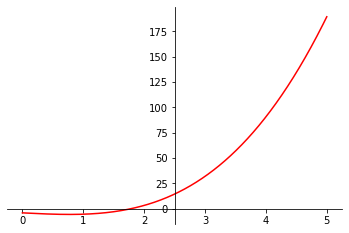

In [17]:
# | f | a | b |
DrawGraph(f, a, b)